In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme()

In [2]:
PALETTE = sns.color_palette("Set2")
sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) 

In [3]:
data = pd.read_csv('marketing_campaign.csv', sep='\t',  index_col='ID',  parse_dates=['Dt_Customer'])

In [4]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [5]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Removing Duplicates

In [6]:
df = data[data.duplicated()]

In [7]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
4119,1963,Master,Together,38620.0,0,0,2013-11-05,56,112,17,...,3,0,0,0,0,0,0,3,11,0
6935,1951,2n Cycle,Married,78497.0,0,0,2013-01-12,44,207,26,...,2,0,0,0,1,0,0,3,11,0
10144,1976,Graduation,Together,51369.0,0,1,2012-10-25,84,297,7,...,8,0,0,0,0,0,0,3,11,0
8652,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,7,0,0,0,0,0,0,3,11,0
933,1978,PhD,Married,37717.0,1,0,2012-11-23,31,9,0,...,9,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,1,0,2013-06-19,40,5,1,...,8,0,0,0,0,0,0,3,11,0
7366,1982,Master,Single,75777.0,0,0,2013-04-07,12,712,26,...,1,0,1,1,0,0,0,3,11,1
4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,24,...,7,0,0,0,0,0,0,3,11,0


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,...,6,0,0,0,0,0,0,3,11,0
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


#### Dt_Customer : Date of customer's enrollment with the company

In [10]:
data['Dt_Customer'].dt.date.max()

datetime.date(2014, 12, 6)

In [11]:
data['Dt_Customer'].dt.date.min()

datetime.date(2012, 1, 8)

##### we are not having any idea in which year this dataset was collected, because the dataset creator doesn't provide us with this information

##### So let's assume that the dataset was collected on the next day of the last customer enrollment + 2 years, because most of the features are aggregated for last 2 years.

# Outlier Analaysis

## Customer Age Distribution

In [12]:
age =  2016 - data['Year_Birth']

In [13]:
age

ID
5524     59
2174     62
4141     51
6182     32
5324     35
         ..
9432     39
10870    49
7270     35
8235     60
9405     62
Name: Year_Birth, Length: 2058, dtype: int64

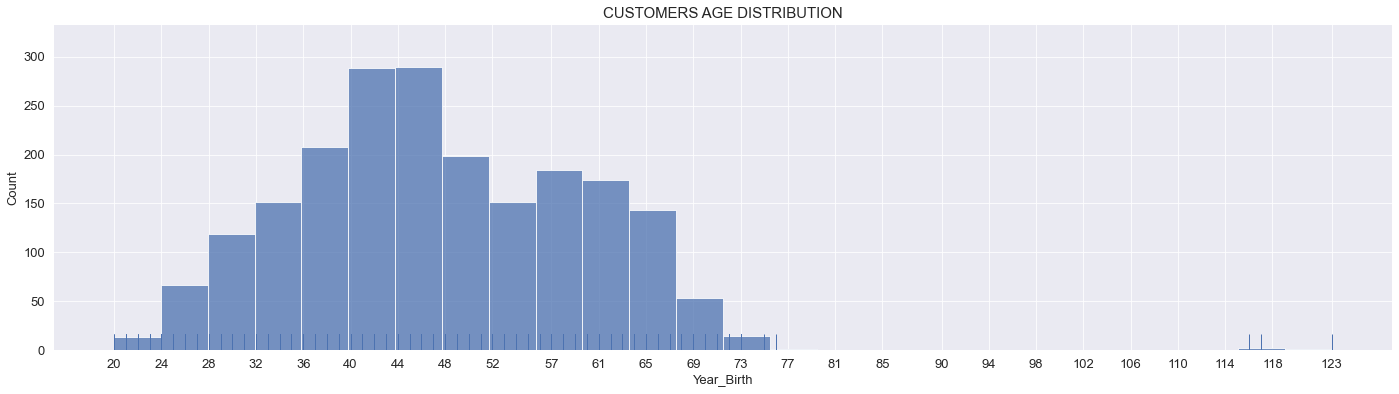

In [14]:
plt.figure(figsize=(24, 6))

plt.title('CUSTOMERS AGE DISTRIBUTION')

ax = sns.histplot(age, bins=26)

sns.rugplot(age, height=.05)

plt.xticks(np.linspace(min(age), max(age), 26, dtype=int, endpoint = True))

plt.show()

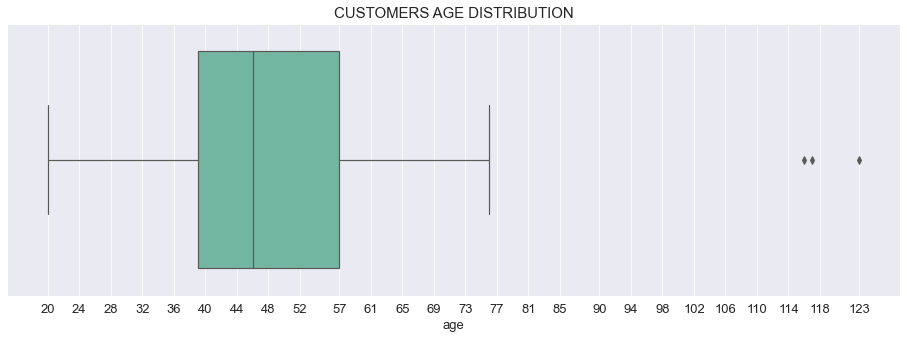

In [15]:
data["age"]  = age

plt.figure(figsize=(16,5))
plt.title(f'CUSTOMERS AGE DISTRIBUTION')
ax = sns.boxplot(data['age'], palette=PALETTE)
plt.xticks(np.linspace(min(age), max(age), 26, dtype=int, endpoint = True))

plt.show()

In [16]:

data.query('age > 114')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
ID,,,,,,,,,,,,,,,,,,,,,
7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,0,0,0,0,0,1,3,11,0,116
11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,0,0,0,0,0,3,11,0,123
1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,0,0,1,0,0,0,3,11,0,117


## INCOME

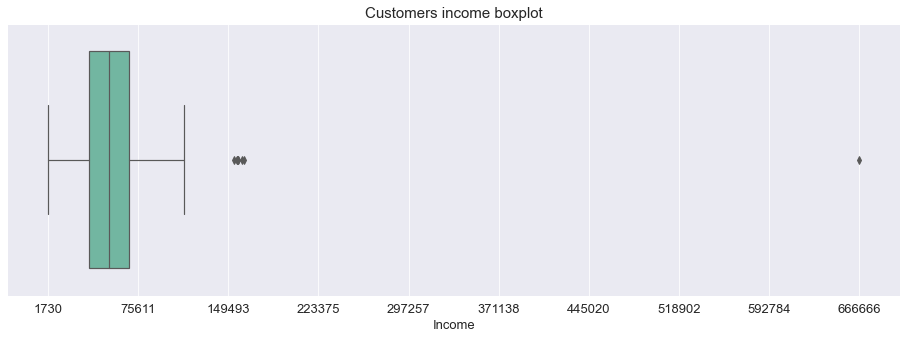

In [17]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(data['Income'], palette=PALETTE)
plt.xticks(np.linspace(data['Income'].min(), data["Income"].max(), 10, dtype=int, endpoint = True))
plt.show()

In [18]:
data.query('Income > 149493')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
ID,,,,,,,,,,,,,,,,,,,,,
8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,...,0,0,0,0,0,0,3,11,0,43
1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,1,...,0,0,0,0,0,0,3,11,0,40
5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,1,...,0,0,0,0,0,0,3,11,0,41
1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,...,0,0,0,0,0,0,3,11,0,34
5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,1,...,0,0,0,0,0,0,3,11,0,45
4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,0,0,0,0,0,0,3,11,0,39
11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,3,11,0,67
9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,...,0,0,0,0,0,0,3,11,0,39


In [19]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [20]:
data["Education"].value_counts()

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64

In [21]:
data['Education'].replace({'2n Cycle': "Master", 
                          "Graduation":'Bachelor'}, inplace=True)

In [22]:
data["Education"].value_counts()

Bachelor    1030
Master       529
PhD          450
Basic         49
Name: Education, dtype: int64

In [23]:
legend = list(data["Education"].value_counts().index)

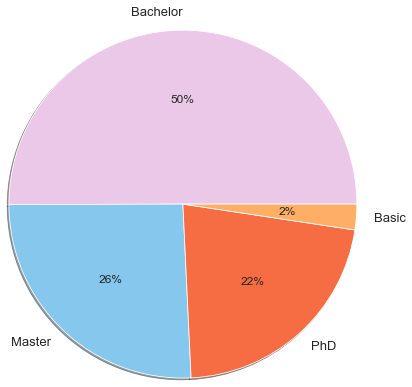

In [24]:
out_df=pd.DataFrame(data.groupby('Education')['Education'].count())
colors = ['#ebc7e8','#85c7ed','#F66D44','#FEAE65']
plt.pie(out_df['Education'].sort_values(ascending=False),labels = legend,colors=colors,autopct='%.0f%%',radius=2,shadow=True)

plt.show()

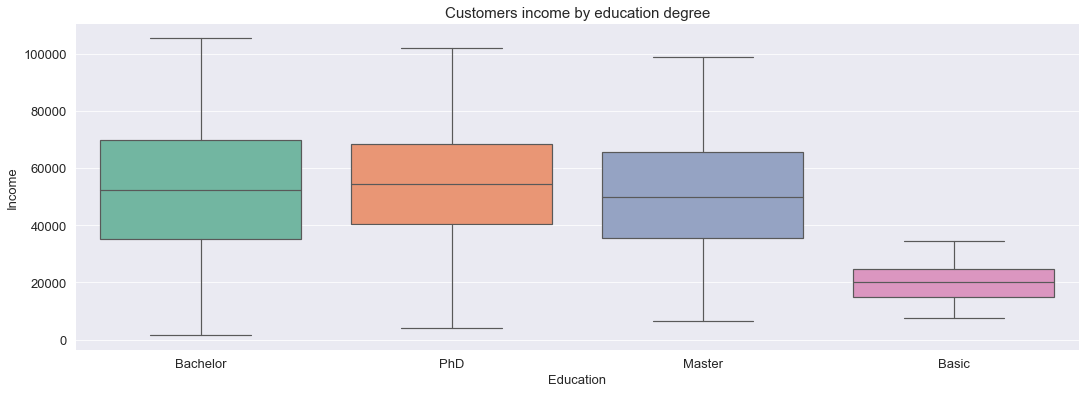

In [25]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=data.query('Income < 149493'), x='Education', y='Income', palette=PALETTE, showfliers=False,)
plt.title('Customers income by education degree')
plt.show()

### Bachelor, PhD and Master degrees Income is around the same, but the Basic degree Income is definetly lower than others

## Marriage Status

In [26]:
data['Marital_Status'].value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

#####  Alone , Absurd , Yolo customers are rare in the store and gives almost same meaning related to single so i am replacing with single for our better analysis because we need information related to the customers having in relationship or not (presence of a partner)

In [27]:
data['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single', inplace=True)


In [28]:
data['Marital_Status'].value_counts()

Married     795
Together    521
Single      455
Divorced    216
Widow        71
Name: Marital_Status, dtype: int64

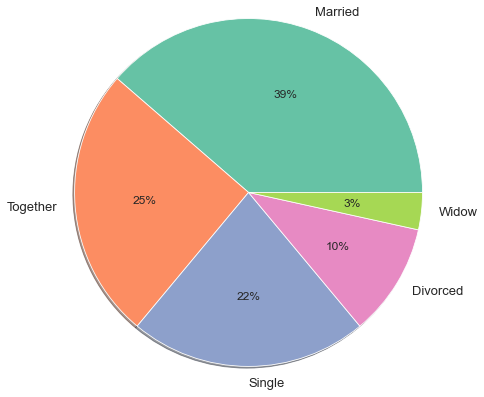

In [29]:
out_df=pd.DataFrame(data.groupby('Marital_Status')['Marital_Status'].count())
colors = ['#ebc7e8','#85c7ed','#F66D44','#FEAE65']
plt.pie(out_df['Marital_Status'].sort_values(ascending=False),labels = data["Marital_Status"].value_counts().index,colors=PALETTE,autopct='%.0f%%',radius=2,shadow=True)

plt.show()

## presence of a partner

In [30]:
data['Marital_Status'].value_counts()

Married     795
Together    521
Single      455
Divorced    216
Widow        71
Name: Marital_Status, dtype: int64

In [31]:
data['HasPartner'] = data["Marital_Status"].replace({'Single': 'No', 
                                                      'Widow': 'No',
                                                      'Divorced': 'No',
                                                      'Together': 'Yes',
                                                      'Married': 'Yes'})

In [32]:
data['HasPartner'].value_counts()

Yes    1316
No      742
Name: HasPartner, dtype: int64

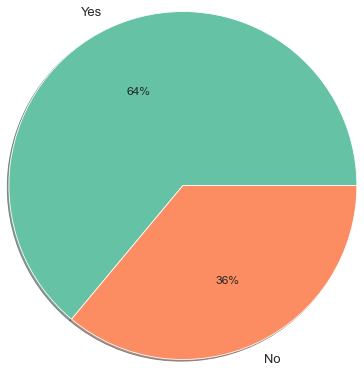

In [33]:
out_df=pd.DataFrame(data.groupby('HasPartner')['HasPartner'].count())

plt.pie(out_df['HasPartner'].sort_values(ascending=False),labels = data['HasPartner'].value_counts().index,colors=PALETTE,autopct='%.0f%%',radius=2,shadow=True)

plt.show()

### So the most customers are in relationships

### Kidhome and Teenhome

In [34]:
data['Kidhome'].value_counts()

0    1184
1     831
2      43
Name: Kidhome, dtype: int64

In [35]:
data['Teenhome'].value_counts()

0    1060
1     948
2      50
Name: Teenhome, dtype: int64

In [36]:
data["Total_Children"] = data['Teenhome']+data['Kidhome']

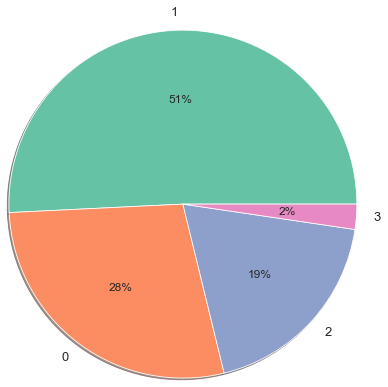

In [37]:
out_df=pd.DataFrame(data.groupby('Total_Children')['Total_Children'].count())

plt.pie(out_df['Total_Children'].sort_values(ascending=False),labels = data['Total_Children'].value_counts().index,colors=PALETTE,autopct='%.0f%%',radius=2,shadow=True)

plt.show()

In [38]:
mnt = data.filter(like='Mnt').apply(lambda x: sum(x), axis=0)

In [39]:
mnt

MntWines            625471
MntFruits            53991
MntMeatProducts     345136
MntFishProducts      76824
MntSweetProducts     55930
MntGoldProds         90291
dtype: int64

In [40]:
dist = dict(mnt)

In [41]:
dist

{'MntWines': 625471,
 'MntFruits': 53991,
 'MntMeatProducts': 345136,
 'MntFishProducts': 76824,
 'MntSweetProducts': 55930,
 'MntGoldProds': 90291}

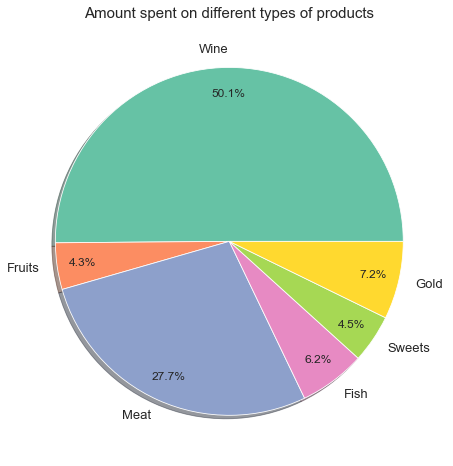

In [42]:
plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(dist.values(), labels=['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.show()

## TOTAL AMOUNT SPENT

### introduce total_amount feature, which is the total amount spent by customer in the last 2 years

In [43]:
data['total_amount'] = data.filter(like='Mnt').sum(axis=1)

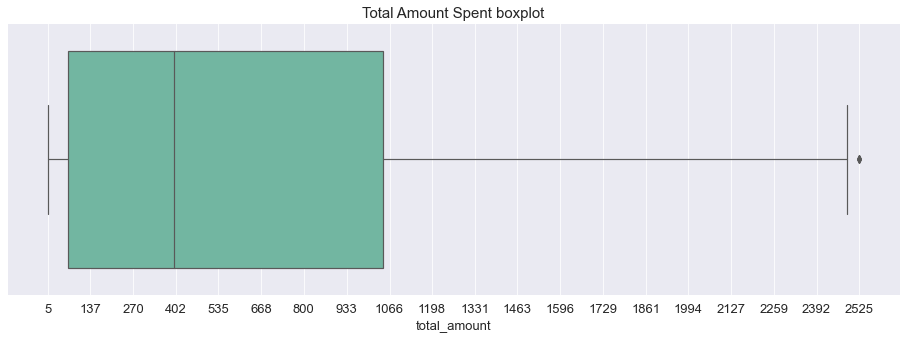

In [44]:
plt.figure(figsize=(16,5))
plt.title(f'Total Amount Spent boxplot')
ax = sns.boxplot(data['total_amount'], palette=PALETTE)
plt.xticks(np.linspace(data['total_amount'].min(), data["total_amount"].max(), 20, dtype=int, endpoint = True))
plt.show()

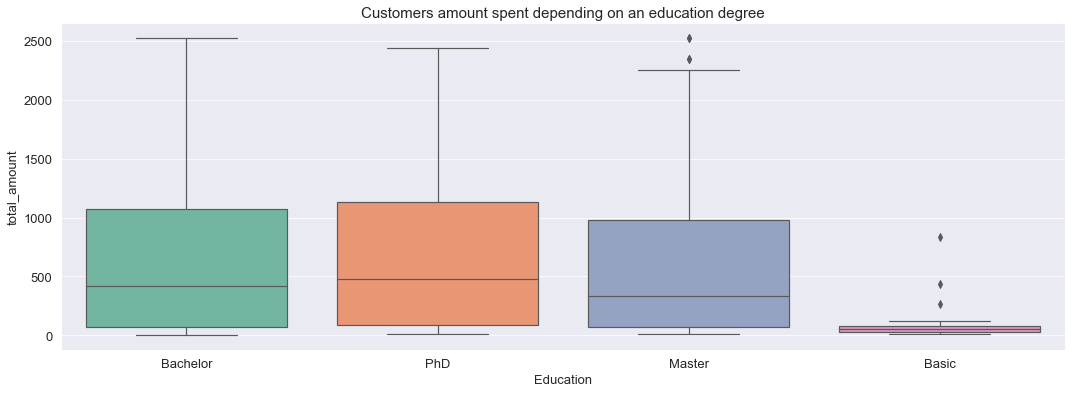

In [45]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='Education', y='total_amount', palette=PALETTE)
plt.title('Customers amount spent depending on an education degree')

plt.show()

#### Customers with PhD degree spent the most amount in last 2 years, customers with Basic degree - the least amount. That corresponds to the Income distribution



## TOTAL PURCHASES

In [46]:
data["NumWebPurchases"].value_counts()

2     343
1     323
3     310
4     253
5     202
6     191
7     144
8      94
9      66
0      45
11     42
10     41
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64

In [47]:
data["NumCatalogPurchases"].value_counts()

0     537
1     453
2     259
3     174
4     168
5     129
6     110
7      72
8      52
10     44
9      38
11     18
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

In [48]:
data["NumStorePurchases"].value_counts()

3     448
4     295
2     207
5     197
6     164
8     136
7     133
10    118
9      99
12     93
13     75
11     71
0      15
1       7
Name: NumStorePurchases, dtype: int64

In [49]:
num = data.filter(regex='Num[^Deals].+Purchases').sum(axis=0)

In [50]:
num

NumWebPurchases         8435
NumCatalogPurchases     5476
NumStorePurchases      11876
dtype: int64

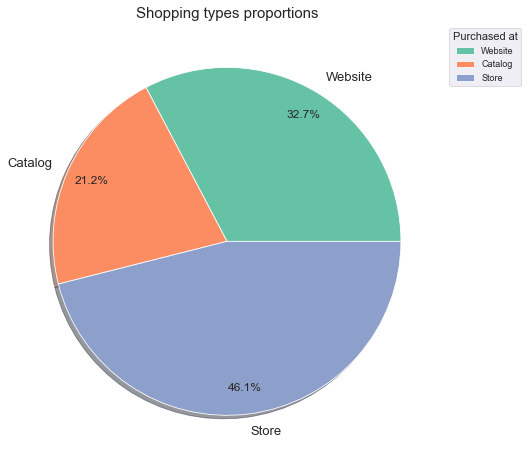

In [51]:
sizes = dict(num)

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Purchased at", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

plt.show()

In [52]:
data['NumTotalPurchases'] = data.filter(regex='Num[^Deals].+Purchases').sum(axis=1)

In [53]:
data['NumTotalPurchases']

ID
5524     22
2174      4
4141     20
6182      6
5324     14
         ..
9432      7
10870    16
7270     18
8235     21
9405      8
Name: NumTotalPurchases, Length: 2058, dtype: int64

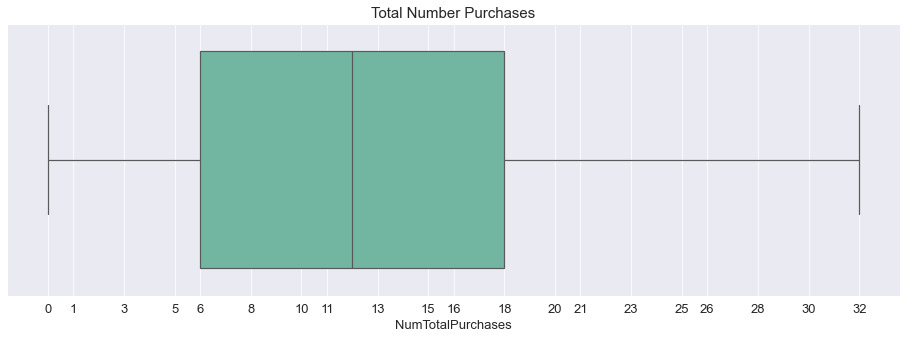

In [54]:
plt.figure(figsize=(16,5))
plt.title(f'Total Number Purchases')
ax = sns.boxplot(data['NumTotalPurchases'], palette=PALETTE)
plt.xticks(np.linspace(data['NumTotalPurchases'].min(), data["NumTotalPurchases"].max(), 20, dtype=int, endpoint = True))
plt.show()

In [55]:
data.loc[(data['NumTotalPurchases'] == 0) & (data['total_amount'] != 0)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,HasPartner,Total_Children,total_amount,NumTotalPurchases
ID,,,,,,,,,,,,,,,,,,,,,
5555,1975,Bachelor,Divorced,153924.0,0,0,2014-07-02,81,1,1,...,0,0,3,11,0,41,No,0,6,0
3955,1965,Bachelor,Divorced,4861.0,0,0,2014-06-22,20,2,1,...,0,0,3,11,0,51,No,0,6,0
6862,1971,Bachelor,Divorced,1730.0,0,0,2014-05-18,65,1,1,...,0,0,3,11,0,45,No,0,8,0
11110,1973,Bachelor,Single,3502.0,1,0,2013-04-13,56,2,1,...,0,0,3,11,0,43,No,1,5,0
9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,...,0,0,3,11,0,53,Yes,2,9,0
11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,3,11,0,67,Yes,0,8,0


In [56]:
data.loc[(data['NumTotalPurchases'] != 0) & (data['total_amount'] == 0)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,HasPartner,Total_Children,total_amount,NumTotalPurchases
ID,,,,,,,,,,,,,,,,,,,,,


##### There are 6 customers with 0 purchases, but total amount spent is not 0. Seems like incorrectly collected data, let's delete these rows.

In [57]:
data.drop(data.loc[(data['NumTotalPurchases'] == 0) & (data['total_amount'] != 0)].index, inplace=True)

In [65]:
data["NumDealsPurchases"].value_counts()

1     881
2     459
3     276
4     179
5      85
6      58
0      38
7      34
8      14
9       7
10      5
11      5
15      5
12      3
13      3
Name: NumDealsPurchases, dtype: int64

In [91]:
data["Atleast three products"] = data["NumDealsPurchases"]>3
data["Atleast three products"].replace({True:"Yes",False:"NO"},inplace =True)

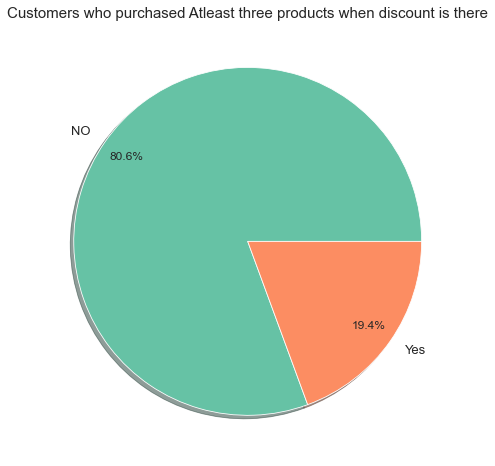

In [92]:
sizes = dict(data["Atleast three products"].value_counts())
plt.figure(figsize=(12, 8))
plt.title("Customers who purchased Atleast three products when discount is there")
plt.pie(sizes.values(), labels=data["Atleast three products"].value_counts().index, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)

plt.show()

In [68]:
data["Atleast three products"].replace({"Yes":1,"NO":0},inplace =True)

### Data Cleaned

In [69]:
data_cleaned = data.drop(data[(data['Income'] >  149493) |
                              (data['age'] > 114)].index)

In [70]:
data_cleaned=data_cleaned.dropna()

In [71]:
NUMERICAL_FEATURES = ['age', 'Income', "Total_Children", 'Recency', 'total_amount', "Atleast three products","NumTotalPurchases"]

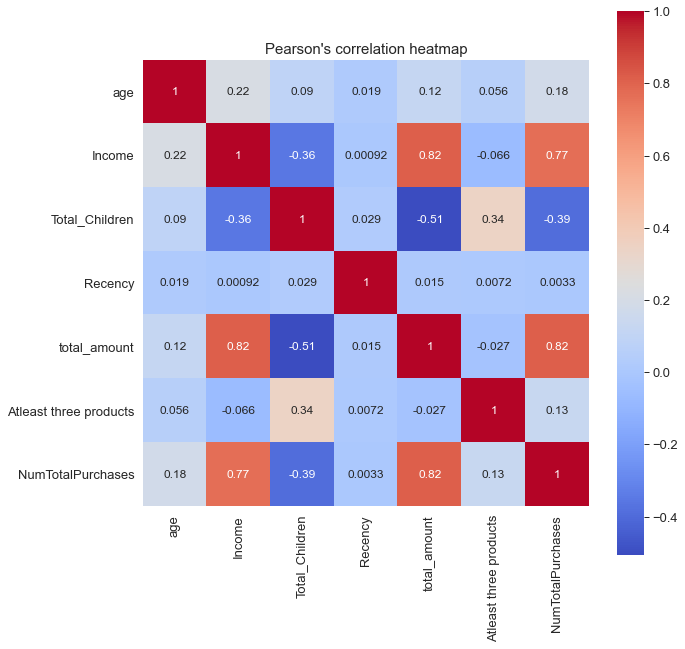

In [72]:
corr_matr = data_cleaned[NUMERICAL_FEATURES].corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', square=True)
plt.title("Pearson's correlation heatmap")
plt.show()

## total amount spent is highly correlated with the Num of total purchases and Income

In [73]:
SELECTED_FEATURES = [ 'Income', 'NumTotalPurchases', 'total_amount']

In [74]:
df = data_cleaned[SELECTED_FEATURES]

## STANDARDIZATION

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.values)
tr = scaler.transform(df.values)

In [76]:
data_cleaned_sc = pd.DataFrame(tr,columns  = SELECTED_FEATURES)

## CLUSTERING

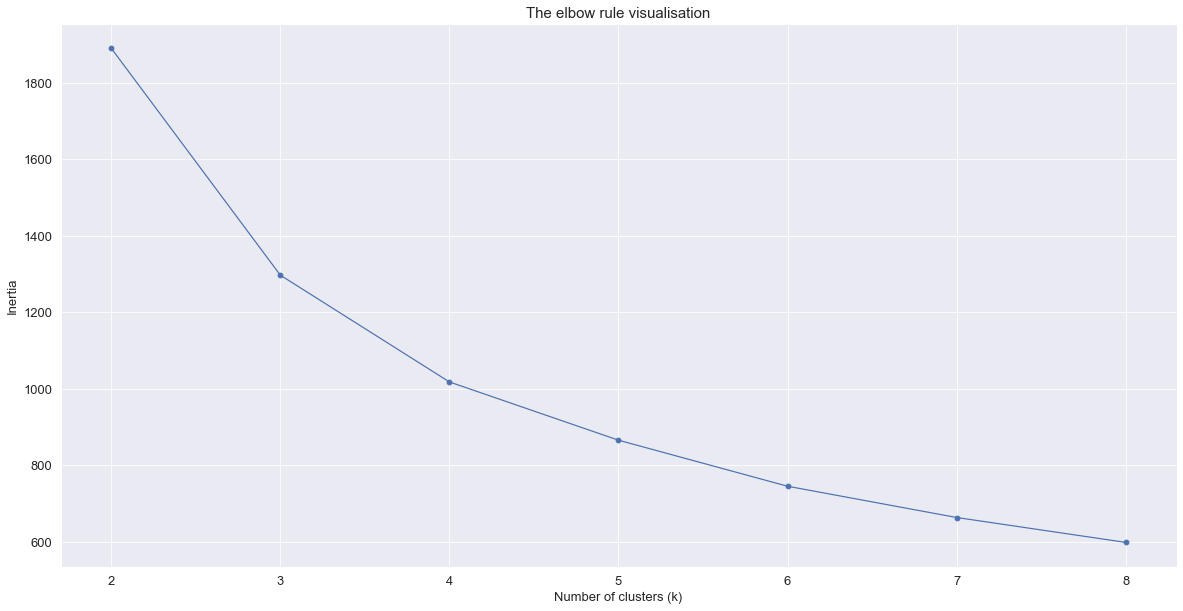

In [77]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, init='k-means++').fit(data_cleaned_sc)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("The elbow rule visualisation")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia');

##### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for this data is 4.

In [78]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_cleaned_sc)

pred = kmeans.predict(data_cleaned_sc)

df_clustered = data_cleaned.copy()
df_clustered['Cluster'] = pred + 1

In [79]:
df_clustered["Cluster"].value_counts()

3    761
4    506
1    435
2    341
Name: Cluster, dtype: int64

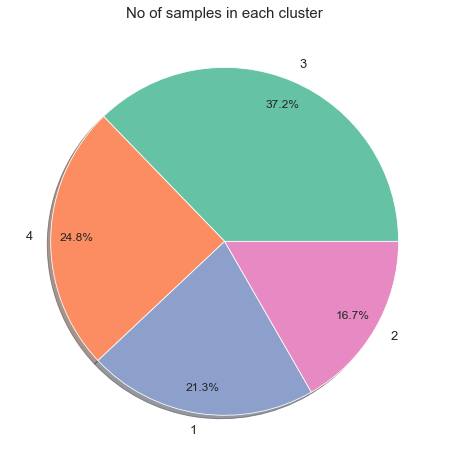

In [80]:
sizes = dict(df_clustered["Cluster"].value_counts())
plt.figure(figsize=(12, 8))
plt.title("No of samples in each cluster")
plt.pie(sizes.values(), labels=df_clustered["Cluster"].value_counts().index, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.show()

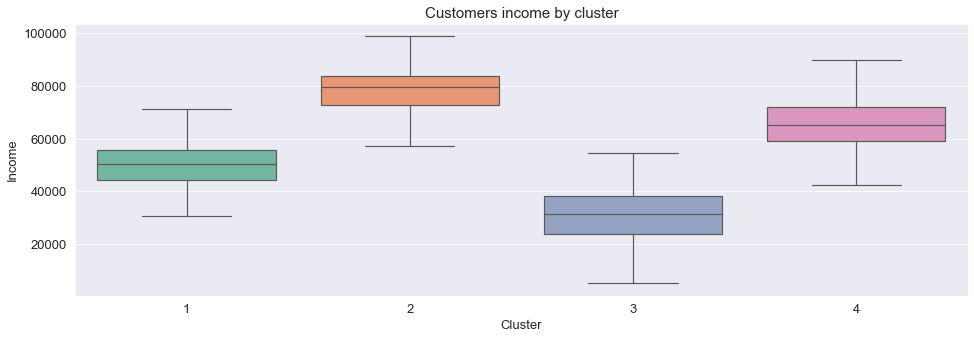

In [81]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df_clustered, x='Cluster', y='Income', palette=PALETTE, showfliers=False)
plt.show()


##### Cluster 1: medium incomes

##### Cluster 2: high income

##### Cluster 3: very Low income

##### Cluster 4: medium income

## Average money Spent by each cluster

In [82]:
amount_spent_by_cluster = (df_clustered.groupby(by='Cluster')['total_amount'].sum().divide(df_clustered['Cluster'].value_counts()))

In [83]:
amount_spent_by_cluster

1     356.393103
2    1641.982405
3      67.798949
4     936.434783
dtype: float64

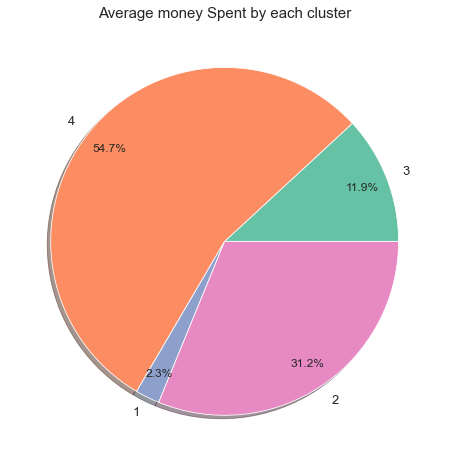

In [84]:
sizes = dict(amount_spent_by_cluster)
plt.figure(figsize=(12, 8))
plt.title("Average money Spent by each cluster")
plt.pie(sizes.values(), labels=df_clustered["Cluster"].value_counts().index, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.show()

##### Medium Income customers spent more money in the store (cluster 4)
##### very high Income customers spent less money in the store (cluster 3)

## Total Number of purchase by each cluster

In [85]:
df_clustered

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Response,age,HasPartner,Total_Children,total_amount,NumTotalPurchases,Atleast three products,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Bachelor,Single,58138.0,0,0,2012-04-09,58,635,88,...,3,11,1,59,No,0,1617,22,0,2
2174,1954,Bachelor,Single,46344.0,1,1,2014-08-03,38,11,1,...,3,11,0,62,No,2,27,4,0,3
4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,...,3,11,0,51,Yes,0,776,20,0,4
6182,1984,Bachelor,Together,26646.0,1,0,2014-10-02,26,11,4,...,3,11,0,32,Yes,1,53,6,0,3
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,11,0,35,Yes,1,422,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,1986,Bachelor,Single,26816.0,0,0,2012-08-17,50,5,1,...,3,11,0,30,No,0,22,3,0,3
10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,11,0,49,Yes,1,1341,16,0,4
7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,11,0,35,No,0,1241,18,0,4


In [86]:
NumTotalPurchases_cluster = (df_clustered.groupby(by='Cluster')['NumTotalPurchases'].sum().divide(df_clustered['Cluster'].value_counts()))

In [87]:
NumTotalPurchases_cluster

1    11.848276
2    20.161290
3     5.122208
4    19.266798
dtype: float64

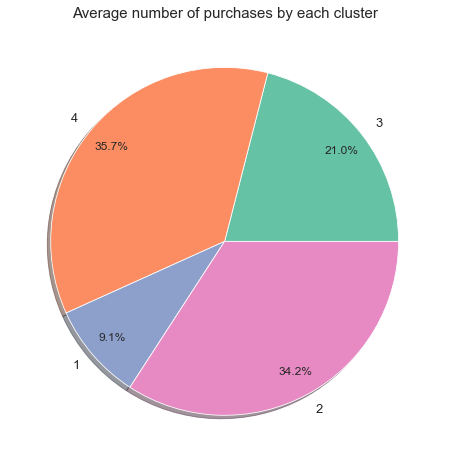

In [88]:
sizes = dict(NumTotalPurchases_cluster)
plt.figure(figsize=(12, 8))
plt.title("Average number of purchases by each cluster")
plt.pie(sizes.values(), labels=df_clustered["Cluster"].value_counts().index, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.show()

## Average number of purchases are high for 4 th cluster